In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
print(dataset.shape)



(10000, 14)


In [4]:
# Checking data contents

dataset.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
#Viewing data
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
# Missing values
dataset.isnull().sum()
# In case of missing values
#dataset['Age'].fillna(value=int(dataset['Age'].median(skipna=True)), inplace=True)
#dataset['Fare'].fillna(value=int(dataset['Fare'].median(skipna=True)), inplace=True)
# For  Objective variables we need to replace with Mode
#full_df['Embarked'].fillna(value=full_df['Embarked'].mode()[0], inplace=True)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

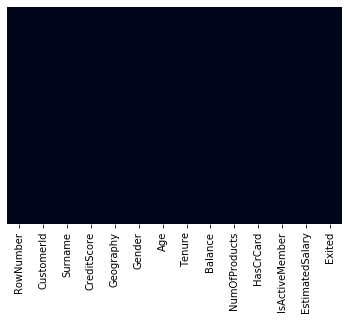

In [7]:
# Missing values plot
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

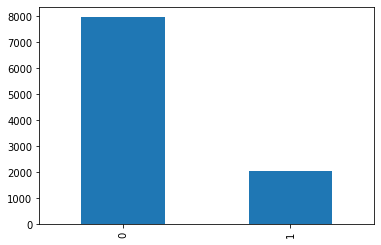

In [8]:
# Univariate Plots for Categorical variables
dataset['Exited'].value_counts().plot.bar()
#creating percentage of males and females
(dataset['Exited'].value_counts()/len(dataset['Exited'])).plot.bar()
plt.show()

In [9]:
# Univariate Analysis- categorical variables
dataset['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# Proportions
dataset['Exited'].value_counts()/dataset.shape[0]


0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [11]:
# Continuous VAriables Summary
dataset.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


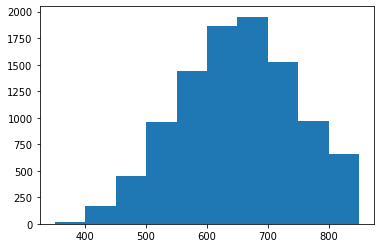

Skewness: -0.071607
Kurtosis: -0.425726


In [12]:
# Univariate - Continuous variablke plotys
plt.hist(dataset['CreditScore'])
plt.show()
print("Skewness: %f" % dataset['CreditScore'].skew())
print("Kurtosis: %f" % dataset['CreditScore'].kurt())

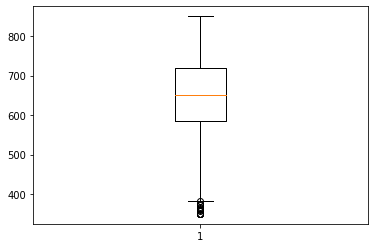

In [13]:
# Box plot
plt.boxplot(dataset['CreditScore'])
plt.show()



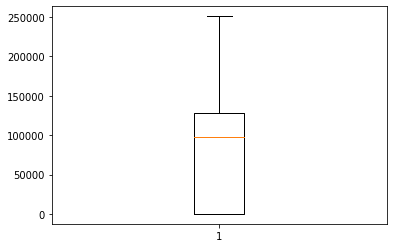

In [14]:
# Box plot
plt.boxplot(dataset['Balance'])
plt.show()

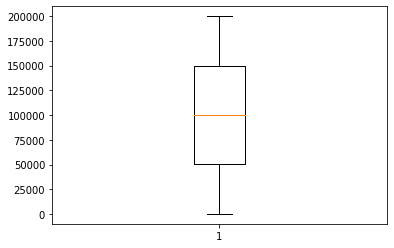

In [15]:
# Box plot
plt.boxplot(dataset['EstimatedSalary'])
plt.show()

In [16]:
# Outliers handleing
# Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

#dataset.loc[dataset['CreditScore']>dataset['CreditScore'].quantile(0.95),['CreditScore']]=dataset['CreditScore'].quantile(0.95)

dataset.loc[dataset['CreditScore']<dataset['CreditScore'].quantile(0.05),['CreditScore']]=dataset['CreditScore'].quantile(0.05)

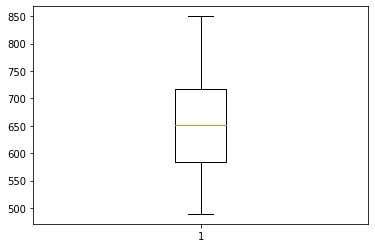

In [17]:
# Box plot
plt.boxplot(dataset['CreditScore'])
plt.show()

In [18]:
# Bi variate Categorical VS Categorical
ct=pd.crosstab(dataset['Gender'],dataset['Exited'],margins=True)
ct


Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


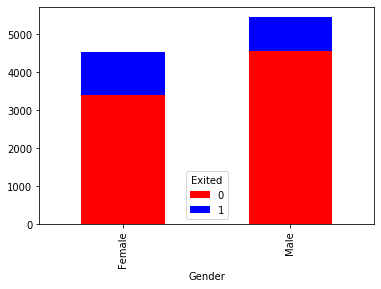

In [19]:
# Categorical Vs categorical Plts
import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'],grid=False)

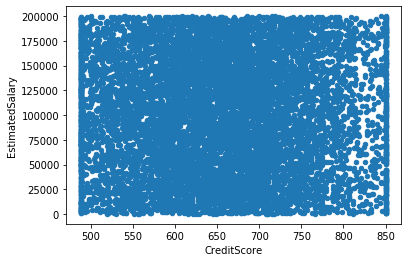

In [20]:
# Bi variate Continuous Vs Continuous

#Continuous Vs Continuous
dataset.plot('CreditScore' , 'EstimatedSalary', kind='scatter')

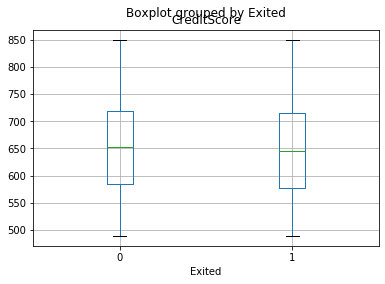

In [21]:
#Categorical-Continuous combination
dataset.boxplot(column='CreditScore', by= 'Exited')

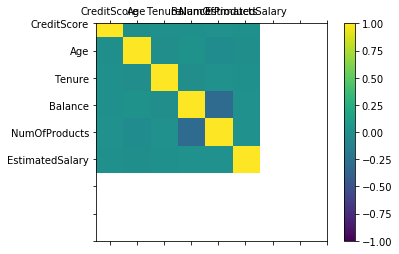

In [22]:
# Correlation plts
import numpy 
# Multivariate Plots ( Continuous Vs Continuous)
dataset1 = dataset[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
names= ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

correlations = dataset1.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


In [23]:
# Inferential testing - Test, Chi square
# Test between Estimated salary VS Exited
# Two Samples  T Test
# studentâœ¬s t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two indedepent sample_space
data1=pd.read_csv("data1.csv")
data1.shape
data2=pd.read_csv("data2.csv")
data2.shape
stat, p = ttest_ind(data1, data2)
print(stat)
print(p)
data1.mean()
data2.mean()

[1.21044976]
[0.22613498]


112542.58    99736.78361
dtype: float64

In [24]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [ [3404, 1139],
[4559, 898]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print(expected)
print(stat)
print(p)

[[3404, 1139], [4559, 898]]
[[3617.5909  925.4091]
 [4345.4091 1111.5909]]
112.91857062096116
2.2482100097131755e-26


In [25]:
# creating independent and dependet variabkles
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [26]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [27]:
#Create dummy variables ( for categorical variables)
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [28]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [29]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [30]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619.0,42,2,0.00,1,1,1,101348.88,0,0,0
1,608.0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502.0,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699.0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516.0,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709.0,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772.0,42,3,75075.31,2,1,0,92888.52,1,0,1


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [34]:
# Imporing all required lobraries
import os
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [35]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [36]:
# Logistic
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


# estimate accuracy on validation dataset
predictions = classifier.predict(X_train)
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))


# estimate accuracy on validation dataset
predictions1 = classifier.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))

predictions1 


0.808875
[[6129  239]
 [1290  342]]
0.8115
[[1527   68]
 [ 309   96]]


C:\Users\Sm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)